# Numerical Analysis for Non-Linear Optimization | Module 1

## Best Samples, Antithetic Variables, and Moment Control Techniques

### 1. Introduction

Monte Carlo methods play a fundamental role in **stochastic simulations**, **numerical optimization**, and **risk analysis**. This module explores advanced variance reduction techniques—**best samples**, **antithetic variables**, and **moment control techniques**—to enhance the efficiency and accuracy of Monte Carlo simulations.

---

### 2. Best Samples: Enhancing Estimation Accuracy

The **best sample selection** technique improves the efficiency of Monte Carlo simulations by selecting sample points that minimize variance while maintaining unbiasedness.

#### 2.1 Importance Sampling and Stratification

- **Importance Sampling**: Weights samples according to their probability density to reduce variance.
- **Stratified Sampling**: Divides the domain into strata and samples each stratum proportionally to ensure even coverage.

#### 2.2 Quasi-Random Sequences

- **Low-discrepancy sequences** (e.g., Sobol, Halton) generate well-spaced samples.
- These sequences reduce **clustering** and improve integration efficiency compared to purely random samples.

---

### 3. Antithetic Variables: Correlation for Variance Reduction

The **antithetic variable method** leverages negatively correlated sample pairs to reduce variance in Monte Carlo estimation.

#### 3.1 Definition and Implementation

- Instead of generating independent samples $X_1, X_2, ..., X_n$, create **correlated pairs** $(X_i, X_i^*)$ such that $X_i^*$ is designed to counteract fluctuations in $X_i$.
- A common choice is $X_i^* = 1 - X_i$ for **uniform** distributions.

#### 3.2 Example: Monte Carlo Estimation of $\pi$

In [1]:
import numpy as np


def monte_carlo_pi_antithetic(n):
    u = np.random.random(n // 2)  # Generate half of the samples
    v = 1 - u  # Generate antithetic pairs
    x = np.concatenate((u, v))  # Combine samples
    y = np.random.random(n)  # Independent Y values
    inside_circle = (x**2 + y**2) <= 1
    return (np.sum(inside_circle) / n) * 4


print("Estimated Pi:", monte_carlo_pi_antithetic(1000000))

Estimated Pi: 3.140284


### 4. Moment Control Techniques: Matching Statistical Moments

Moment control techniques enforce constraints on moments (mean, variance, skewness) to enhance Monte Carlo estimates.

#### 4.1 Control Variates Method

- **Exploits known expectations** of auxiliary variables to adjust the estimator.
- Given a function $f(X)$, introduce a control variable $g(X)$ with a known expected value.
- Adjust the estimator using:
  $$
  \hat{I} = \frac{1}{n} \sum_{i=1}^{n} \left[ f(X_i) - c(g(X_i) - E[g]) \right]
  $$
  where $c$ is an **optimal coefficient** minimizing variance.

#### 4.2 Example: Control Variates in Integration

In [7]:
def f(x):
    return np.exp(-(x**2))  # Target function


def g(x):
    return 1 - x**2  # Control variate (simpler function)


n = 10000
x = np.random.uniform(0, 1, n)
f_x = f(x)
g_x = g(x)

c = -np.cov(f_x, g_x)[0, 1] / np.var(g_x)  # Optimal coefficient
I_hat = np.mean(f_x + c * (g_x - np.mean(g_x)))  # Adjusted estimate

print("Monte Carlo estimate of integral using Control Variates:", I_hat)

Monte Carlo estimate of integral using Control Variates: 0.7447807488614572


---

### 5. Applications in Monte Carlo Simulations

These variance reduction techniques have broad applications across **finance**, **engineering**, and **scientific computing**. Below are implementations demonstrating their practical utility.

#### 5.1 Estimating the Price of a European Call Option

In [3]:
import numpy as np


def monte_carlo_european_call(S0, K, T, r, sigma, num_simulations):
    dt = T  # Single-step simulation
    U = np.random.normal(0, 1, num_simulations // 2)  # Standard normal samples
    V = -U  # Antithetic pairs

    Z = np.concatenate((U, V))  # Combine for variance reduction
    ST = S0 * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    payoff = np.maximum(ST - K, 0)
    discounted_payoff = np.exp(-r * T) * payoff
    return np.mean(discounted_payoff), np.std(discounted_payoff) / np.sqrt(
        num_simulations
    )


# Parameters
S0, K, T, r, sigma, num_simulations = 100, 100, 1, 0.05, 0.2, 100000
call_price, error = monte_carlo_european_call(S0, K, T, r, sigma, num_simulations)
print(f"European Call Option Price: {call_price:.4f} ± {error:.4f}")

European Call Option Price: 10.4483 ± 0.0466


#### 5.2 Risk Analysis: Estimating Value at Risk (VaR)

In [4]:
import scipy.stats as stats


def monte_carlo_var(initial_value, mu, sigma, T, alpha, num_simulations):
    dt = T
    Z = np.random.normal(0, 1, num_simulations)
    ST = initial_value * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    losses = initial_value - ST
    var_estimate = np.percentile(losses, 100 * (1 - alpha))
    return var_estimate


var_value = monte_carlo_var(1_000_000, 0.07, 0.2, 1, 0.95, 100000)
print(f"Estimated 95% Value at Risk (VaR): ${var_value:,.2f}")

Estimated 95% Value at Risk (VaR): $-457,645.25


#### 5.3 Path Simulation in Stochastic Differential Equations

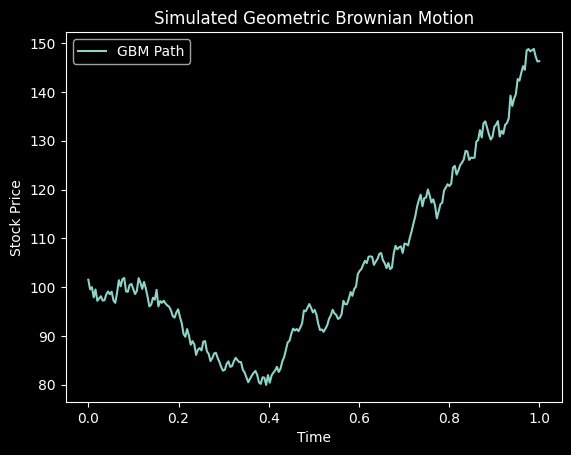

In [5]:
import matplotlib.pyplot as plt


def simulate_gbm(S0, mu, sigma, T, N):
    dt = T / N
    t = np.linspace(0, T, N)
    W = np.cumsum(np.random.randn(N) * np.sqrt(dt))  # Wiener process
    S = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)
    return t, S


t, S = simulate_gbm(100, 0.05, 0.2, 1, 252)
plt.plot(t, S, label="GBM Path")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Simulated Geometric Brownian Motion")
plt.legend()
plt.show()

### 6. Conclusion

Applying **best samples**, **antithetic variables**, and **moment control techniques** significantly improves the efficiency of Monte Carlo methods. By **reducing variance**, these methods accelerate convergence, leading to **more reliable numerical solutions**.

### 7. Exercises

#### Basic Implementations

1. Implement a Monte Carlo estimator for **normal expectations** using antithetic variables.
2. Compare variance reduction for **integration of $\sin(x)$** using stratified vs. simple sampling.

#### Advanced Applications

1. Apply moment control techniques to estimate **European call option prices**.
2. Modify Monte Carlo simulations for **stochastic differential equations (SDEs)** using **variance reduction methods**.